In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('HCBG_Customer_dataset.csv',encoding='UTF8')
df=data.iloc[:,[5,9,24,37,43]]
data.head()

,Contact ID,Contact External ID,Buying Horizon,Company Revenue,Company Type,Country,Created DateTime,Department,Disqualified Reason,Division,...,conv leads,convoptys,convoptyss,wonconvoptys,PageViews,formsubmits,webvisits,emailclicks,emailopens,EmailSends
0,13286639,C3MCG000013286639,NaN,NaN,NaN,Japan,11/18/2020 14:01,?????????,NaN,MSD - Medical Solutions Division,...,10,9,9,5,188,19,30,46,21,87
1,1032647,C3MCG000001032647,NaN,NaN,NaN,New Zealand,1/19/2017 2:00,NaN,NaN,MSD - Medical Solutions Division,...,4,4,4,4,50,10,19,31,104,170
2,10250004,C3MCG000010250004,NaN,NaN,NaN,Korea - Republic of,8/6/2019 5:11,NaN,NaN,OCSD - Oral Care Solutions Division,...,4,4,4,4,44,9,7,18,16,52
3,12728278,C3MCG000012728278,NaN,NaN,NaN,Korea - Republic of,7/10/2020 13:07,NaN,NaN,OCSD - Oral Care Solutions Division,...,4,4,4,4,17,10,3,12,19,48
4,12198860,C3MCG000012198860,NaN,NaN,NaN,Malaysia,4/18/2020 19:05,NaN,Does not meet requirements,OCSD - Oral Care Solutions Division,...,3,3,3,3,23,6,4,17,6,39


In [4]:
numerical_df=data.iloc[:,list(range(49,59,1))]

In [5]:
#convoptyss 지우기
numerical_df=numerical_df.drop("convoptyss",axis=1)
numerical_df.head()

,conv leads,convoptys,wonconvoptys,PageViews,formsubmits,webvisits,emailclicks,emailopens,EmailSends
0,10,9,5,188,19,30,46,21,87
1,4,4,4,50,10,19,31,104,170
2,4,4,4,44,9,7,18,16,52
3,4,4,4,17,10,3,12,19,48
4,3,3,3,23,6,4,17,6,39


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_num_data=scaler.fit_transform(numerical_df)
# scaled_num_data

pca = PCA(n_components = 4)
PCA_result=pca.fit_transform(scaled_num_data)
print(pca.explained_variance_ratio_)
PCA_df=pd.DataFrame(data = PCA_result
             , columns = ['PCA1', 'PCA2','PCA3','PCA4'])
sum(pca.explained_variance_ratio_)

[0.3704451  0.23311671 0.11710478 0.09053216]


0.8111987647393603

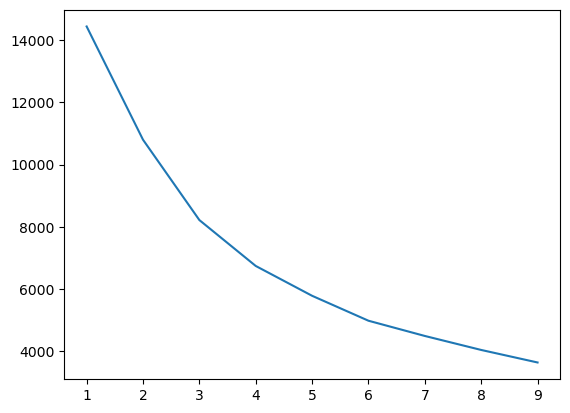

In [7]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(PCA_df)
    
    x.append(k)
    y.append(kmeans.inertia_)
    
plt.plot(x, y)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

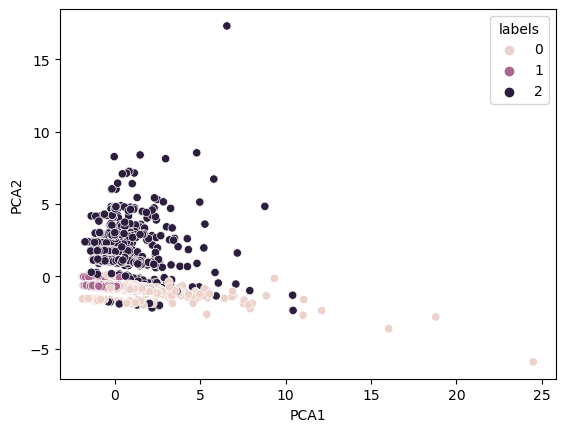

In [10]:
from sklearn.mixture import GaussianMixture
import seaborn as sns

gmm=GaussianMixture(n_components=3, random_state=123)
model=gmm.fit(PCA_df)
PCA_df["labels"]=model.predict(PCA_df)

sns.scatterplot(x='PCA1', y='PCA2', hue='labels', data=PCA_df)

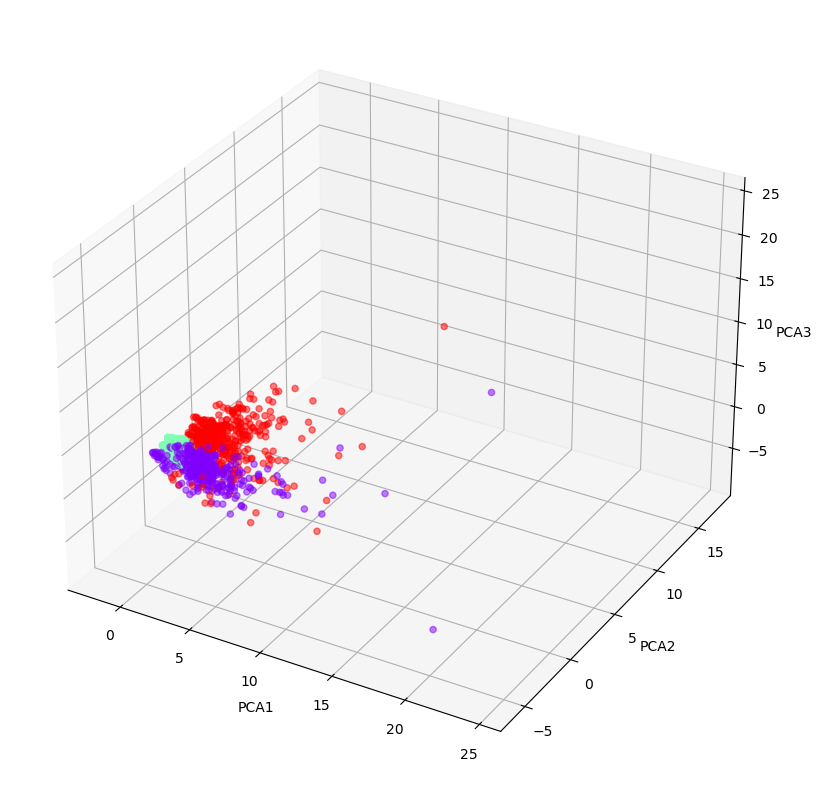

In [11]:
# 위의 clustering 결과를 3차원 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

x = PCA_df['PCA1']
y = PCA_df['PCA2']
z = PCA_df['PCA3']
ax.scatter(x, y, z, c = PCA_df["labels"], s= 20, alpha=0.5, cmap='rainbow')
